In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import itertools
#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.cm as cm

In [ ]:
# import dataset
df = pd.read_csv("/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-cleaned-transformed.csv", skipinitialspace=True)

# Clustering

## K-Means

In [ ]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

Series([], dtype: object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   length_ms           2417 non-null   int64  
 1   intensity           2417 non-null   float64
 2   zero_crossings_sum  2417 non-null   int64  
 3   mfcc_mean           2417 non-null   float64
 4   mfcc_max            2417 non-null   float64
 5   sc_mean             2417 non-null   float64
 6   sc_std              2417 non-null   float64
 7   sc_min              2417 non-null   float64
 8   sc_max              2417 non-null   float64
 9   sc_kur              2417 non-null   float64
 10  stft_mean           2417 non-null   float64
 11  stft_std            2417 non-null   float64
 12  stft_min            2417 non-null   float64
 13  stft_kur            2417 non-null   float64
 14  mean                2417 non-null   float64
 15  kur                 2417 non-null   float64
 16  skew  

In [ ]:
df.columns

Index(['length_ms', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'stft_mean',
       'stft_std', 'stft_min', 'stft_kur', 'mean', 'kur', 'skew'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df)
train_data

array([[0.23305208, 0.56979173, 0.48262032, ..., 0.4357256 , 0.13341265,
        0.63271216],
       [0.28164097, 0.61717788, 0.36115917, ..., 0.43551534, 0.31060606,
        0.63728457],
       [0.5048007 , 0.66456403, 0.55056622, ..., 0.43667004, 0.05448389,
        0.63981134],
       ...,
       [0.6700611 , 0.40659359, 0.19833281, ..., 0.43175398, 0.05593306,
        0.56558978],
       [0.23305208, 0.38124809, 0.1964061 , ..., 0.4335173 , 0.21102804,
        0.54029148],
       [0.26214722, 0.5019204 , 0.18504247, ..., 0.435841  , 0.19563576,
        0.81531347]])

In [ ]:
%%time
sse_list = []
for k in range(2, 50):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)

CPU times: user 44.5 s, sys: 14.9 s, total: 59.4 s
Wall time: 9.92 s


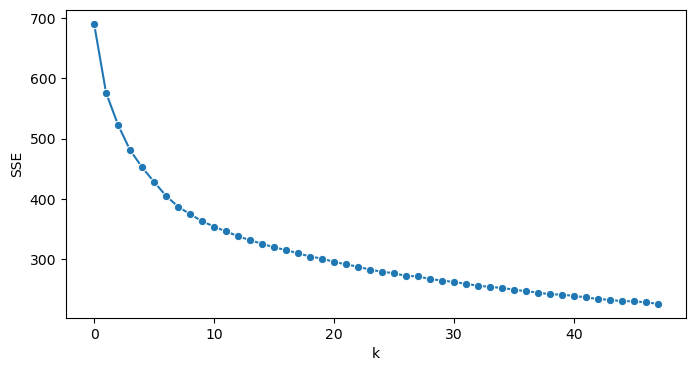

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

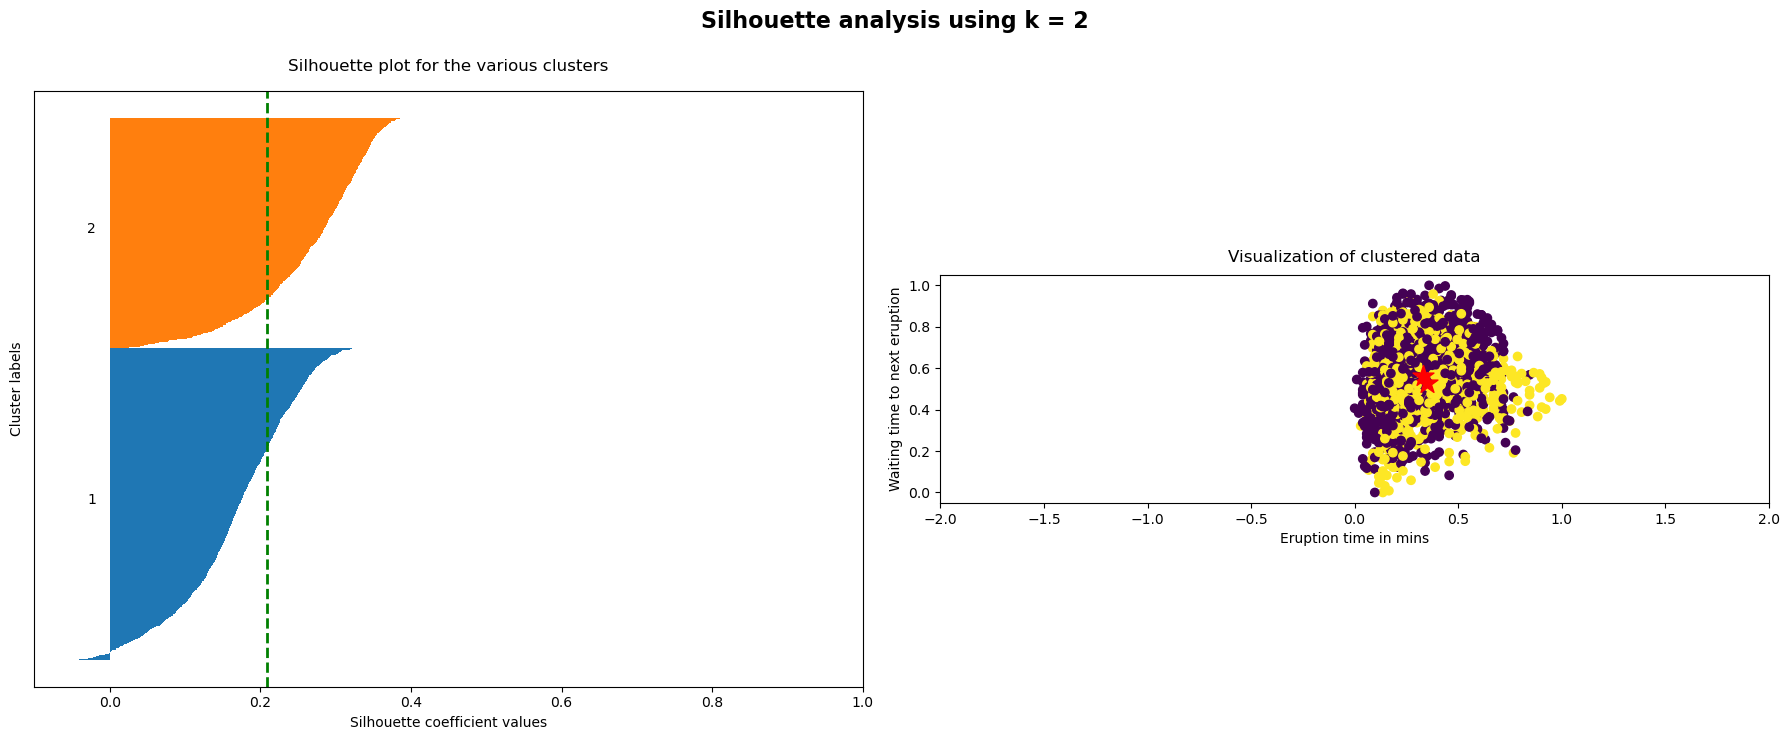

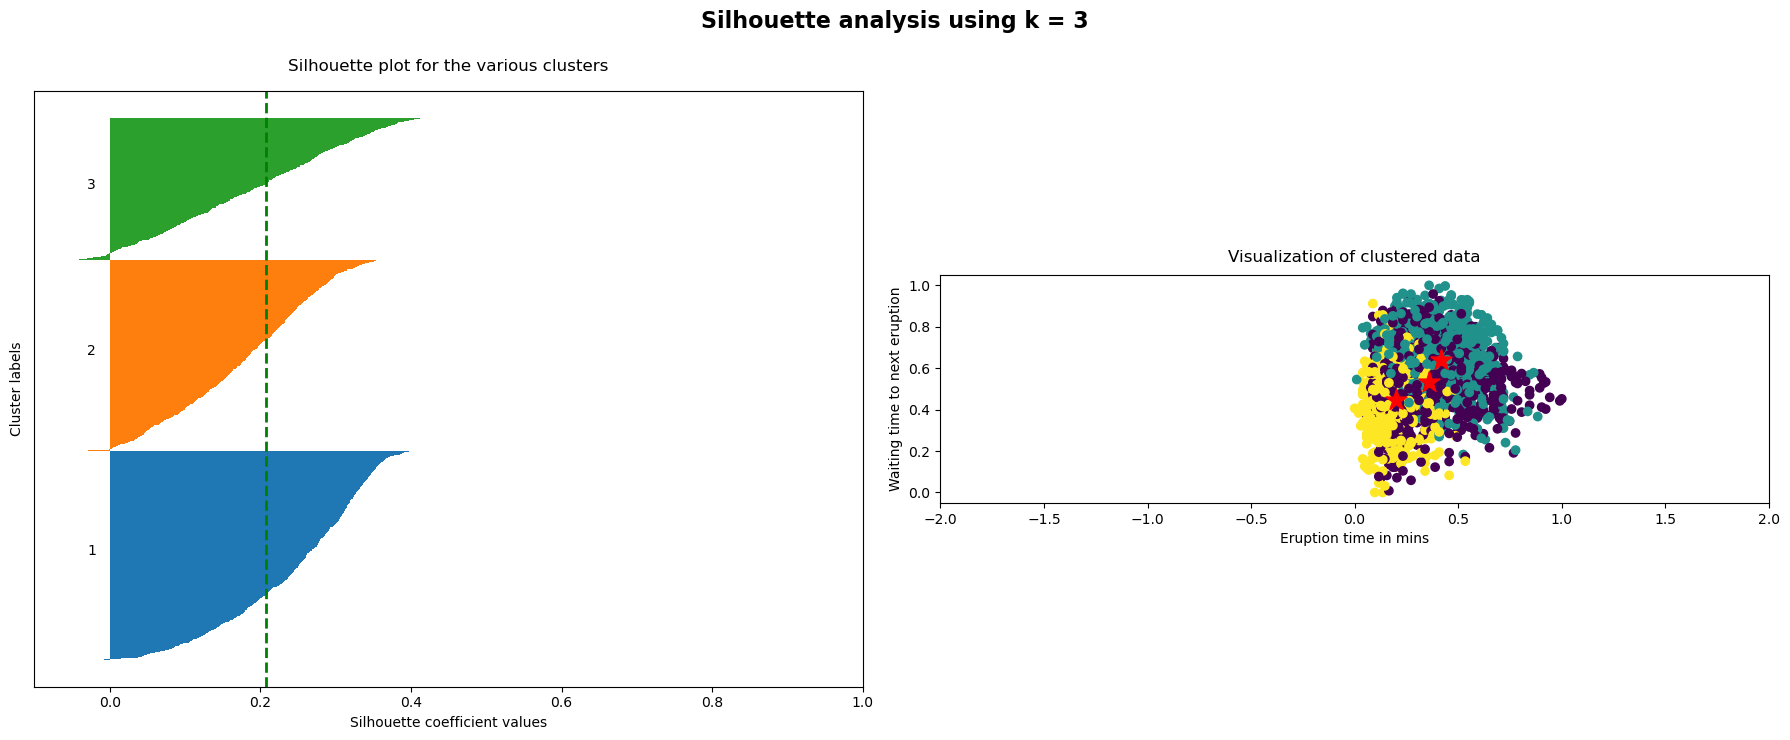

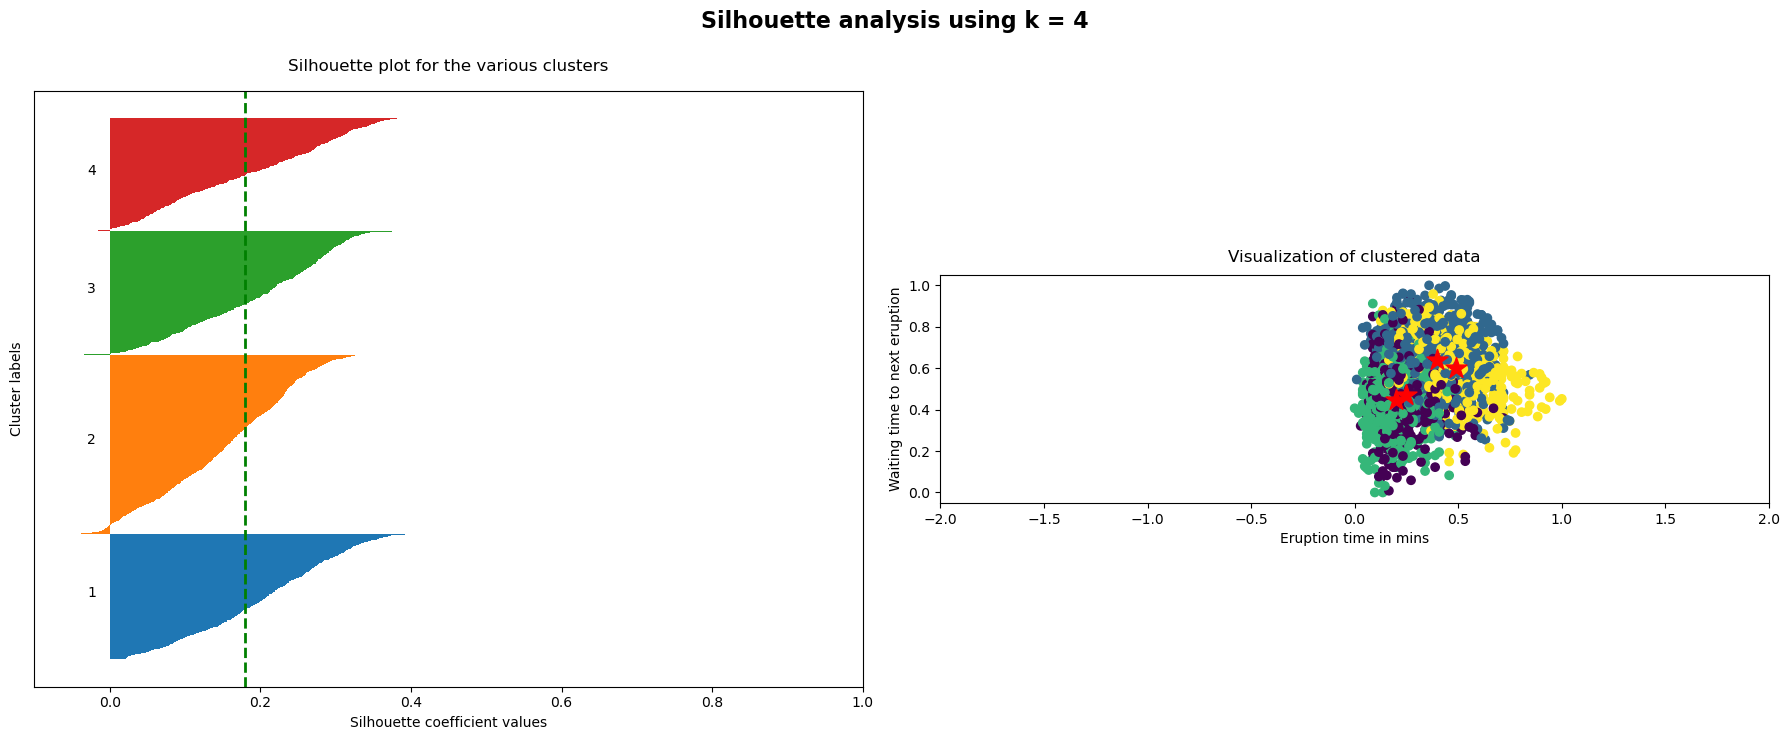

In [ ]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(train_data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(train_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    # Scatter plot of data colored with labels
    ax2.scatter(train_data[:, 0], train_data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels {0: 859, 1: 626, 2: 932}
sse 575.7607556112227
silhouette 0.20827564133662052


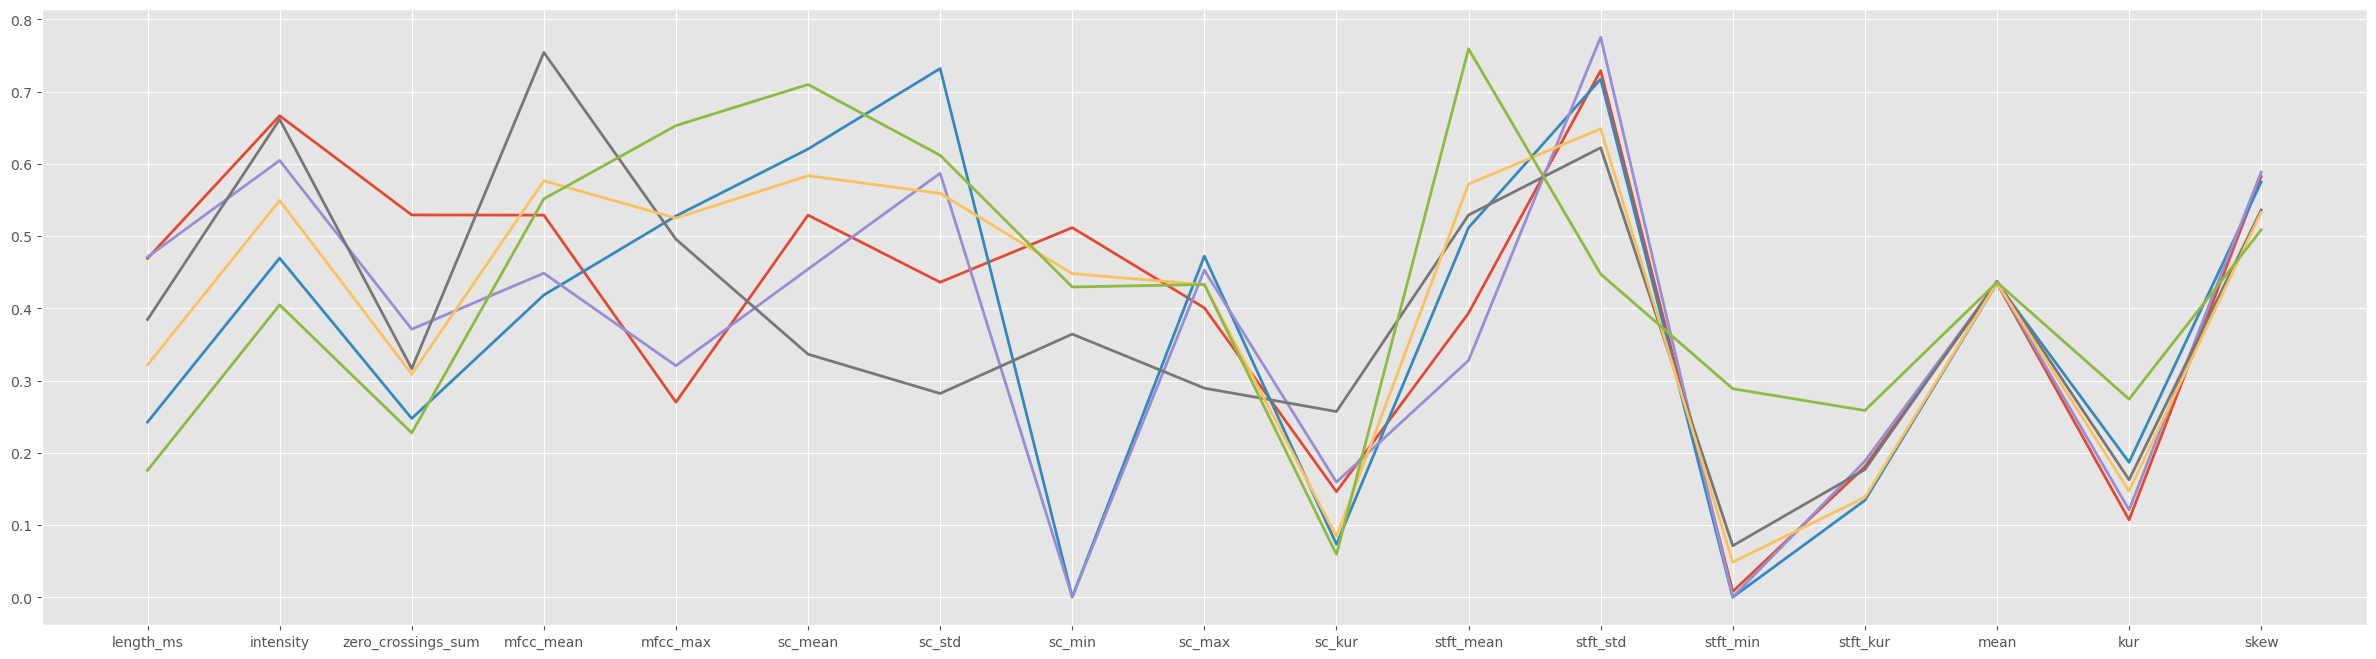

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(30,8))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(range(0, 17), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=2)
plt.xticks(range(0, 17), list(df.columns))
plt.show()

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels {0: 317, 1: 451, 2: 251, 3: 537, 4: 275, 5: 586}
sse 452.42781413538586
silhouette 0.17472610380549639


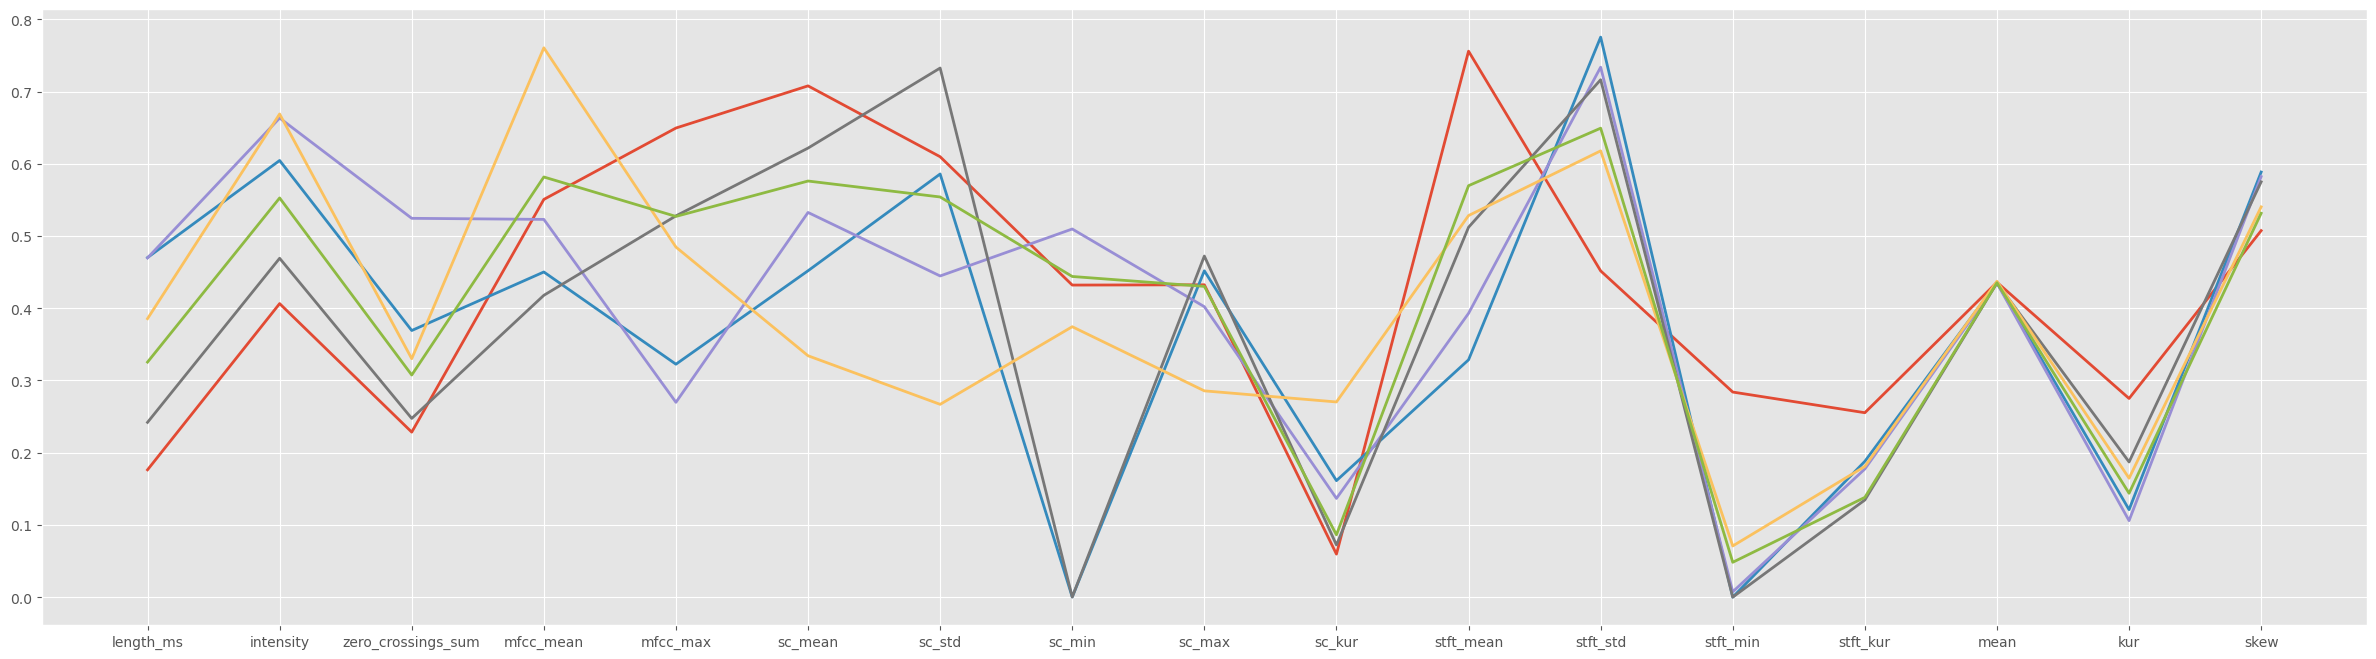

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(30,8))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(range(0, 17), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=2)
plt.xticks(range(0, 17), list(df.columns))
plt.show()

In [ ]:
df_selected = df[['intensity', 'length_ms', 'zero_crossings_sum']]
df_selected.head()

,intensity,length_ms,zero_crossings_sum
0,-36.793432,3737,16995
1,-34.542085,3904,13906
2,-32.290737,4671,18723
3,-49.019839,3637,11617
4,-31.214503,4404,15137


In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_selected)
train_data

array([[0.56979173, 0.23305208, 0.48262032],
       [0.61717788, 0.28164097, 0.36115917],
       [0.66456403, 0.5048007 , 0.55056622],
       ...,
       [0.40659359, 0.6700611 , 0.19833281],
       [0.38124809, 0.23305208, 0.1964061 ],
       [0.5019204 , 0.26214722, 0.18504247]])

In [ ]:
%%time
sse_list = []
for k in range(2, 20):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_d  ata)
    sse_list.append(kmeans.inertia_)

CPU times: user 11 s, sys: 4.58 s, total: 15.6 s
Wall time: 2.77 s


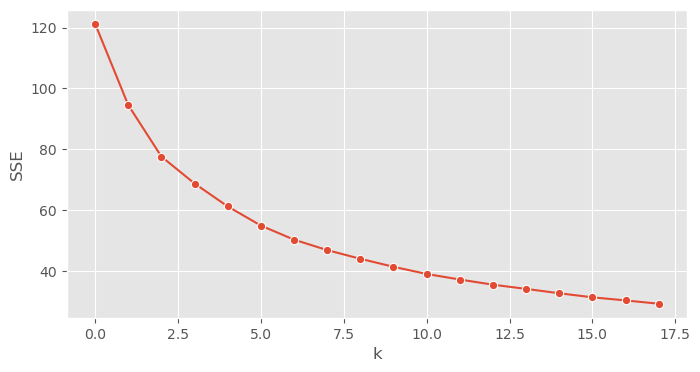

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

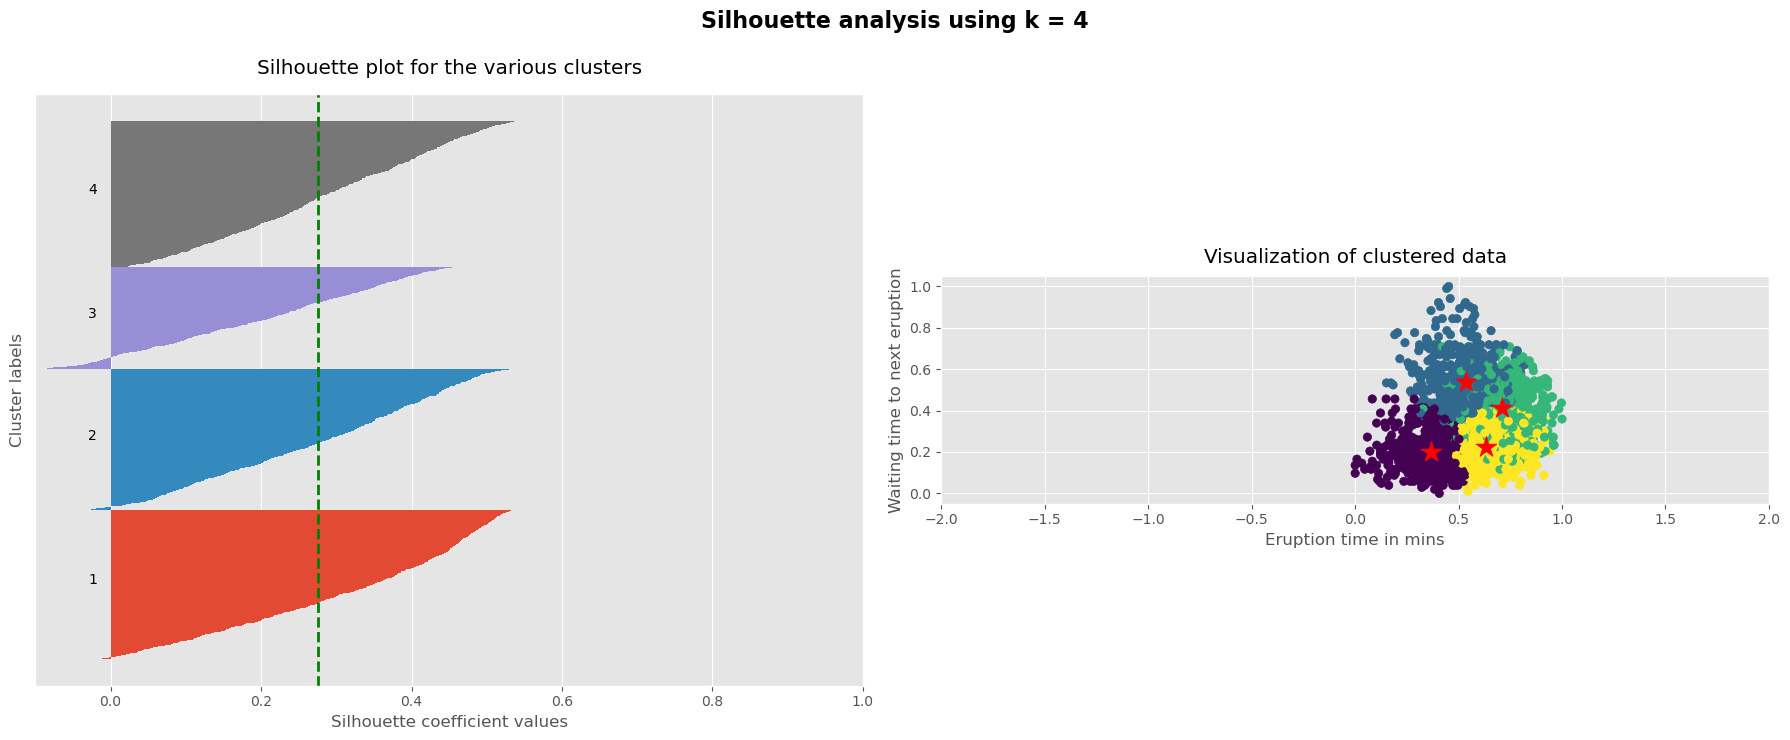

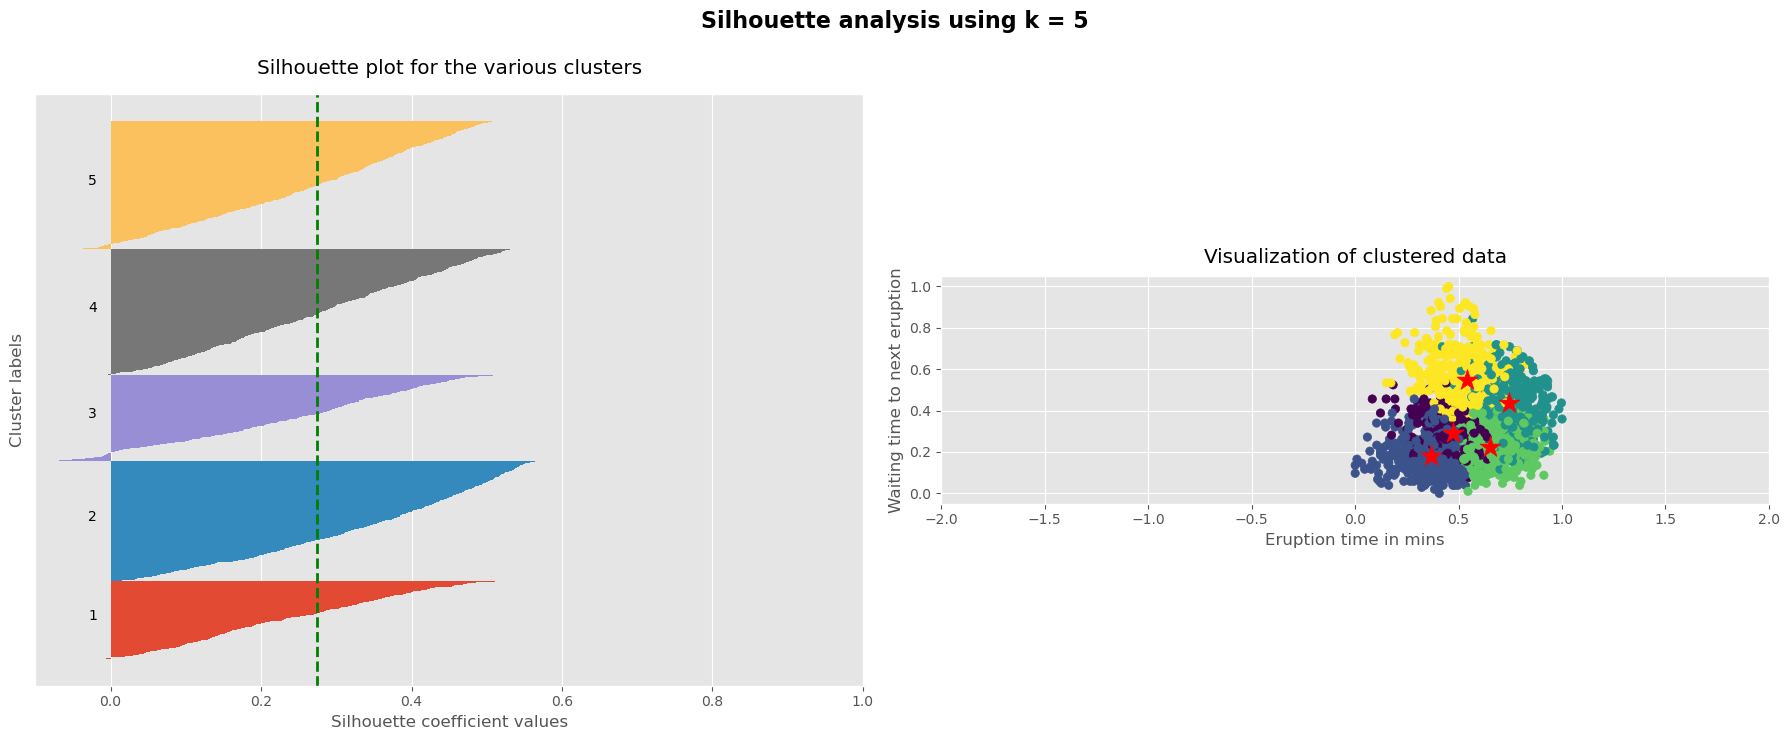

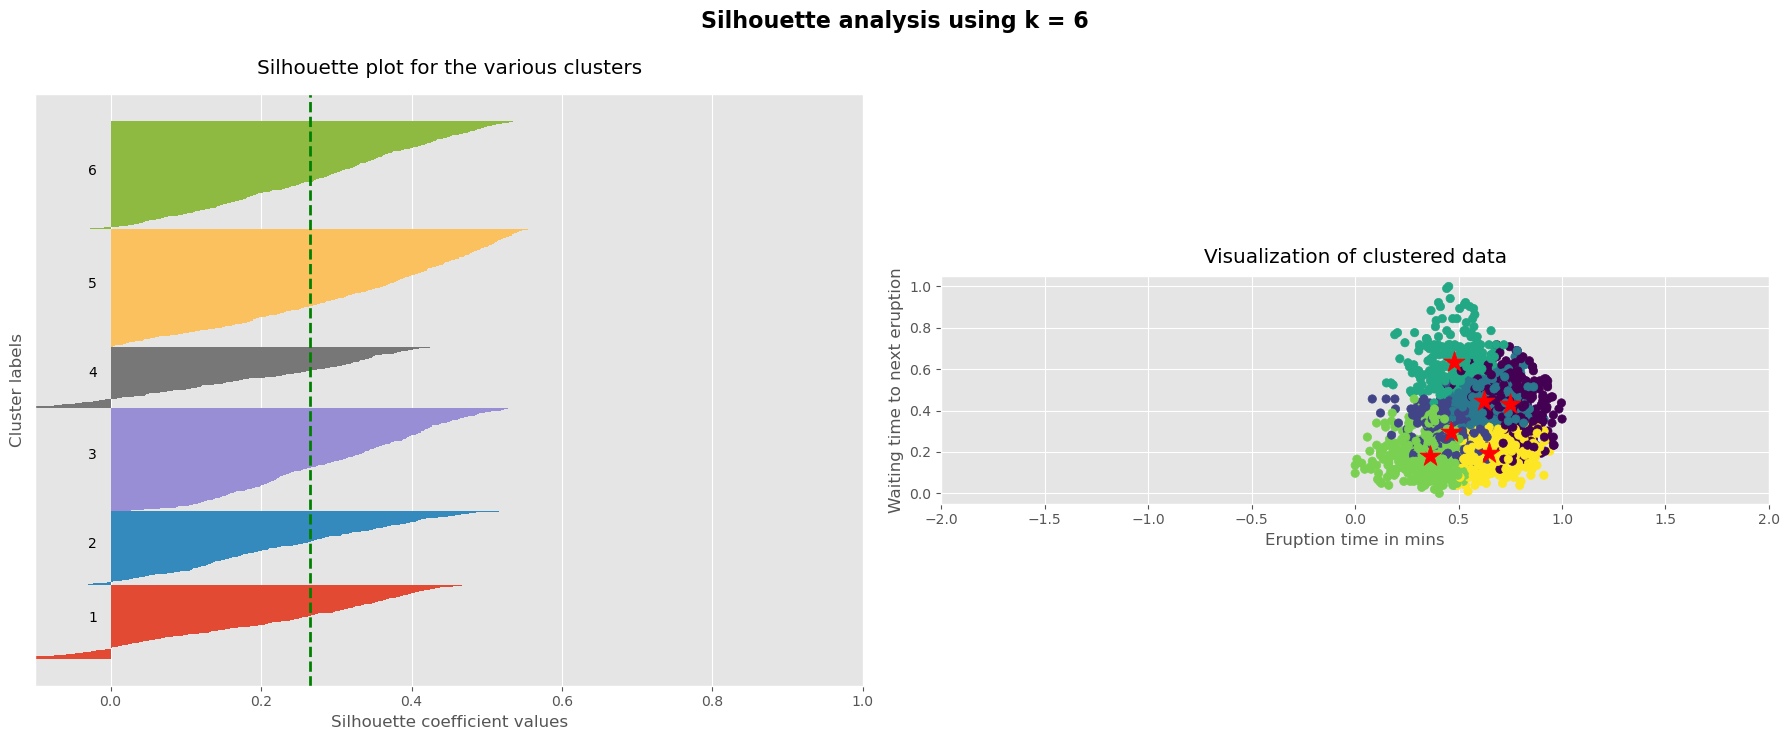

In [ ]:
for i, k in enumerate([4, 5, 6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(train_data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(train_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    # Scatter plot of data colored with labels
    ax2.scatter(train_data[:, 0], train_data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=100)
y_clusters = kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels {0: 754, 1: 653, 2: 1010}
sse 94.55656033863222
silhouette 0.3014530905298754


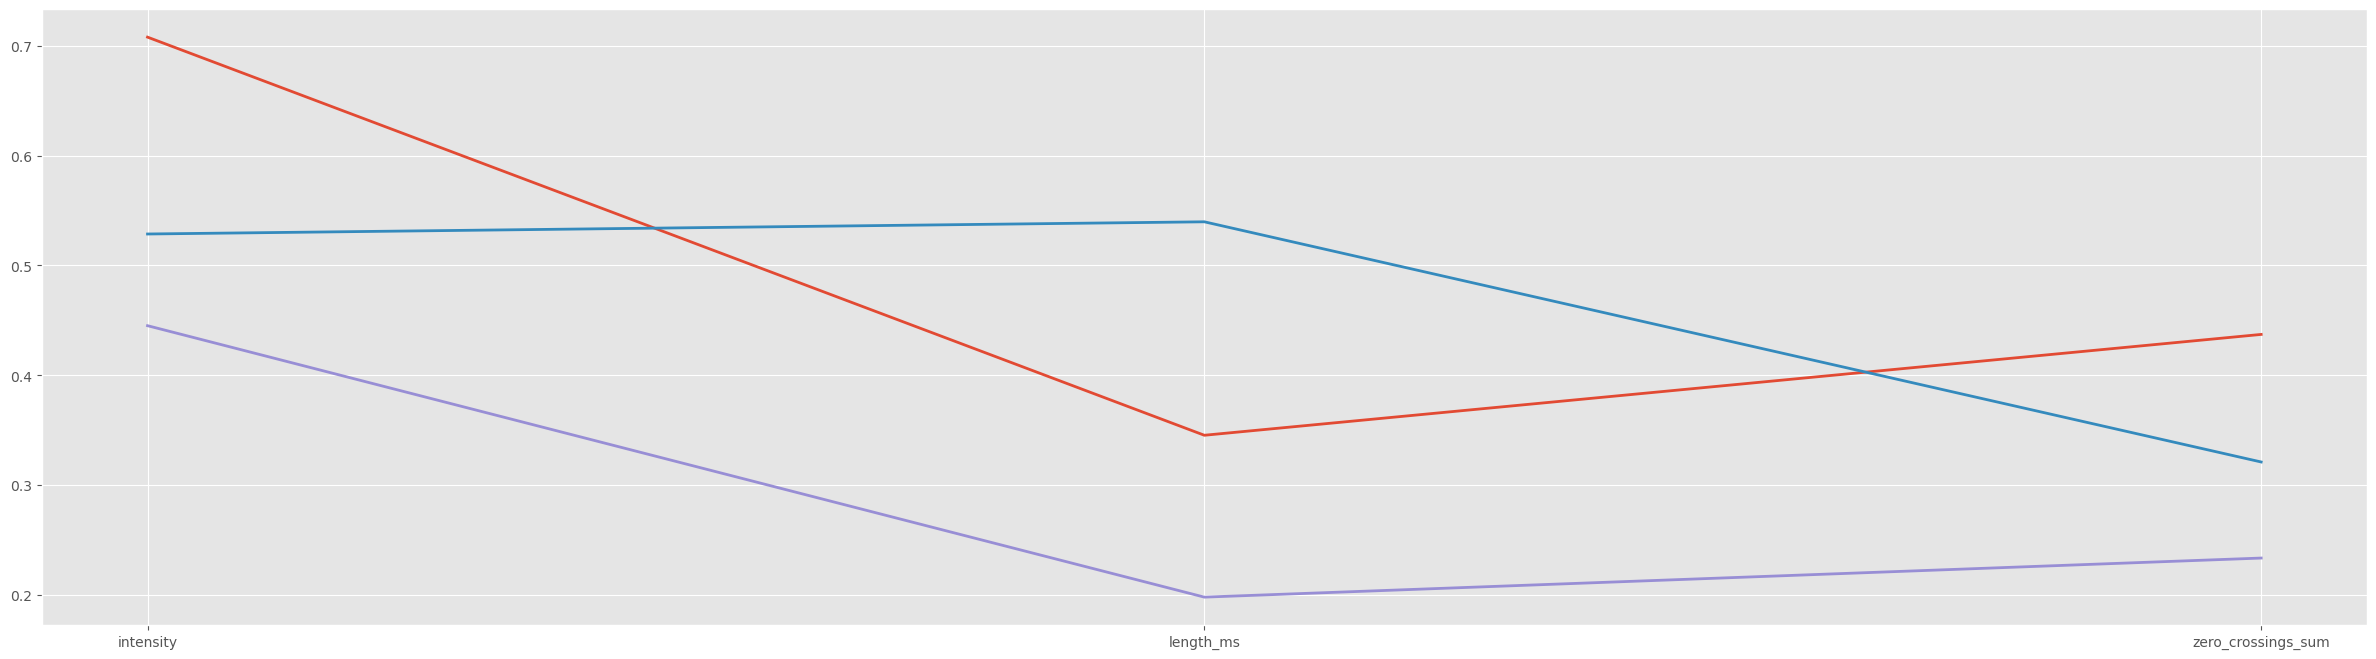

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(30,8))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(range(0, 3), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=2)
plt.xticks(range(0, 3), list(df_selected.columns))
plt.show()

/var/folders/b8/0ht51ff15jdfnjptfvjnynk80000gn/T/ipykernel_8548/3454057821.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


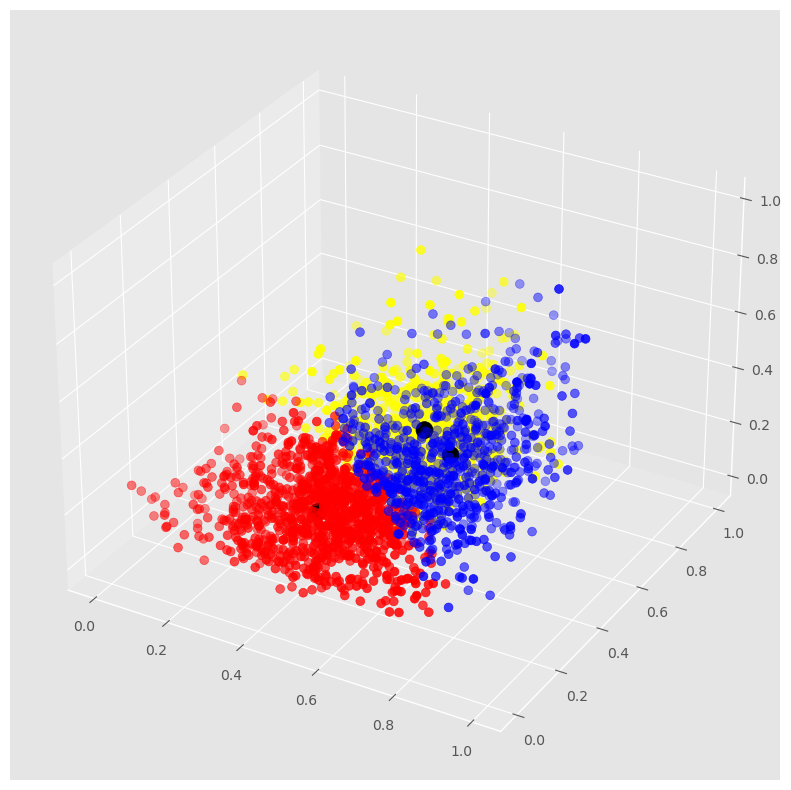

In [ ]:
labels = kmeans.predict(train_data)                      # Getting the cluster labels
centroids = kmeans.cluster_centers_             # Centroid values
# print("Centroids are:", centroids)              # From sci-kit learn
X = train_data


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

x = np.array(labels==0)
y = np.array(labels==1)
z = np.array(labels==2)
# a = np.array(labels==3)
# b = np.array(labels==4)


ax.scatter(X[x,0],X[x,1],X[x,2],c="blue",s=40,label="C1")
ax.scatter(X[y,0],X[y,1],X[y,2],c="yellow",s=40,label="C2")
ax.scatter(X[z,0],X[z,1],X[z,2],c="red",s=40,label="C3")
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c="black",s=150,label="Centers",alpha=1)
# ax.scatter(X[a,0],X[a,1],X[a,2],c="black",s=40,label="C2")
# ax.scatter(X[b,0],X[b,1],X[b,2],c="pink",s=40,label="C3")

<Figure size 2500x2500 with 0 Axes>

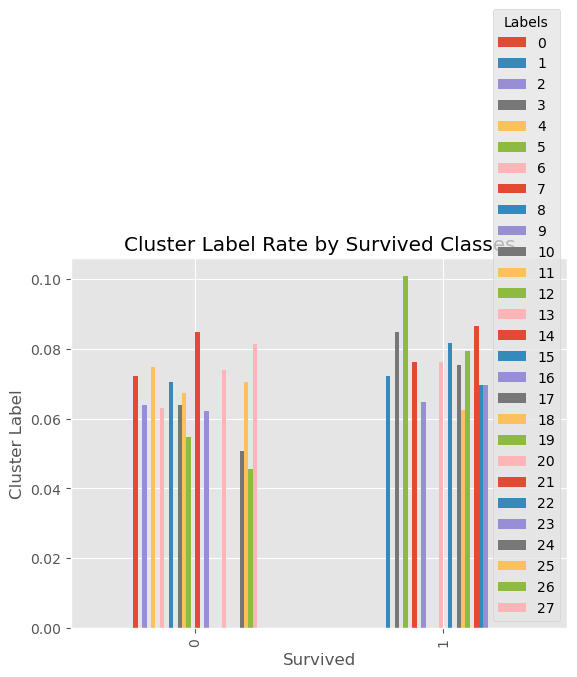

In [ ]:
plt.figure(figsize=(25,25))
sex_xt_pct = sex_xt.div(sex_xt.sum(1).astype(float), axis=0)
sex_xt_pct.plot(kind='bar', title='Cluster Label Rate by Survived Classes')
plt.xlabel('Survived')
plt.ylabel('Cluster Label')
plt.show()

In [ ]:
df_clusters[df_clusters['Labels']==3].describe()

,intensity,sex_val,emotion_val,emotional_intensity_val,statement_val,actor_fill,Labels
count,96.000000,96.0,96.000000,96.0,96.0,96.000000,96.0
mean,-34.083782,1.0,1.937500,1.0,0.0,5.354167,3.0
std,7.917104,0.0,1.390286,0.0,0.0,3.470110,0.0
min,-56.684174,1.0,0.000000,1.0,0.0,1.000000,3.0
25%,-38.357602,1.0,1.000000,1.0,0.0,3.000000,3.0
50%,-32.728244,1.0,2.000000,1.0,0.0,5.000000,3.0
75%,-29.038871,1.0,3.000000,1.0,0.0,9.000000,3.0
max,-19.613252,1.0,4.000000,1.0,0.0,11.000000,3.0


In [ ]:
df.to_csv('/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-k-means-all.csv')

In [ ]:
df_selected.to_csv('/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-k-means-selected.csv')

## DBScan

In [ ]:
#Continuous features
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df)
train_data

array([[0.23305208, 0.56979173, 0.48262032, ..., 0.4357256 , 0.13341265,
        0.63271216],
       [0.28164097, 0.61717788, 0.36115917, ..., 0.43551534, 0.31060606,
        0.63728457],
       [0.5048007 , 0.66456403, 0.55056622, ..., 0.43667004, 0.05448389,
        0.63981134],
       ...,
       [0.6700611 , 0.40659359, 0.19833281, ..., 0.43175398, 0.05593306,
        0.56558978],
       [0.23305208, 0.38124809, 0.1964061 , ..., 0.4335173 , 0.21102804,
        0.54029148],
       [0.26214722, 0.5019204 , 0.18504247, ..., 0.435841  , 0.19563576,
        0.81531347]])

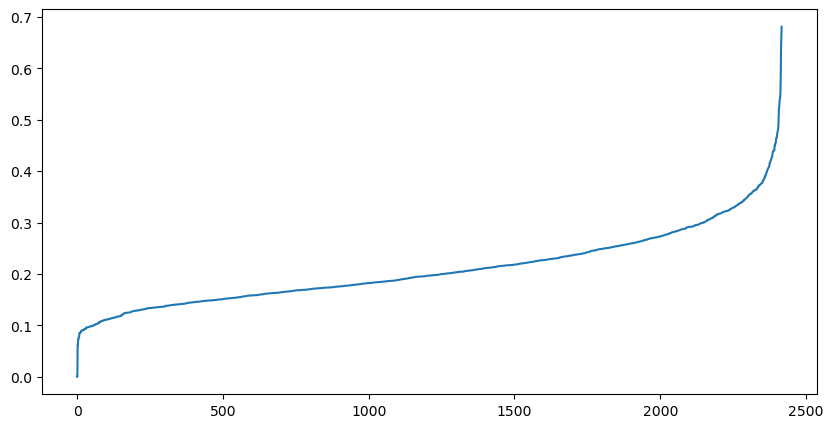

In [ ]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(train_data)
distances, idx = nn.kneighbors(train_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=17)
dbscan.fit(train_data)

DBSCAN(eps=0.4, min_samples=17)

In [ ]:
labels = dbscan.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 129
Silhouette Coefficient: 0.258


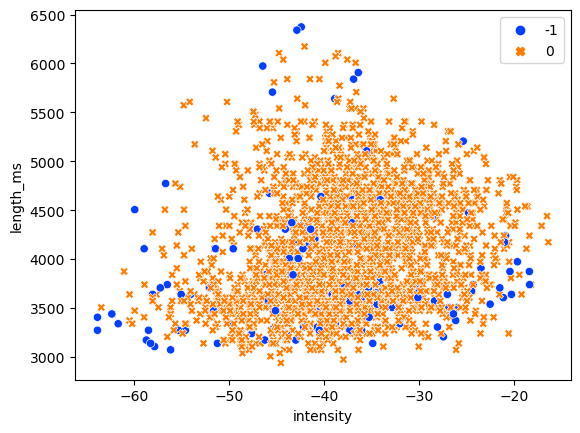

In [ ]:
sns.scatterplot(data=df, x="intensity", y="length_ms", hue=dbscan.labels_,
                style=dbscan.labels_, palette="bright")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=17)
dbscan.fit(train_data)

DBSCAN(eps=0.7, min_samples=17)

In [ ]:
labels = dbscan.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 1
Silhouette Coefficient: 0.510


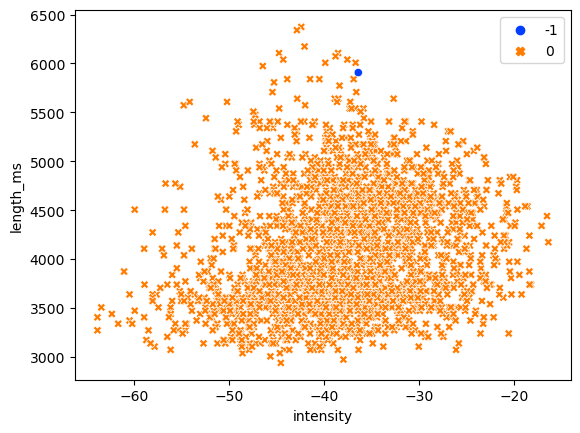

In [ ]:
sns.scatterplot(data=df, x="intensity", y="length_ms", hue=dbscan.labels_,
                style=dbscan.labels_, palette="bright")
plt.show()

In [ ]:
pca_eps_values = np.arange(0.4,0.8,0.1)
pca_min_samples = np.arange(10,18)
pca_dbscan_params = list(itertools.product(pca_eps_values, pca_min_samples))
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(train_data)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    print(p[0])
    print([p[1]])
    pca_sil_score.append(silhouette_score(train_data, pca_dbscan_cluster.labels_))
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
pca_eps_min_df

0.4
[10]
0.4
[11]
0.4
[12]
0.4
[13]
0.4
[14]
0.4
[15]
0.4
[16]
0.4
[17]
0.5
[10]
0.5
[11]
0.5
[12]
0.5
[13]
0.5
[14]
0.5
[15]
0.5
[16]
0.5
[17]
0.6
[10]
0.6
[11]
0.6
[12]
0.6
[13]
0.6
[14]
0.6
[15]
0.6
[16]
0.6
[17]
0.7
[10]
0.7
[11]
0.7
[12]
0.7
[13]
0.7
[14]
0.7
[15]
0.7
[16]
0.7
[17]


,no_of_clusters,silhouette_score,epsilon_values,minimum_points
0,2,0.263169,0.4,10
1,2,0.265365,0.4,11
2,2,0.261462,0.4,12
3,2,0.259428,0.4,13
4,2,0.258202,0.4,14
5,2,0.254792,0.4,15
6,2,0.258093,0.4,16
7,2,0.258093,0.4,17
8,2,0.364055,0.5,10
9,2,0.368217,0.5,11


In [ ]:
#Selected features
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_selected)
train_data

array([[0.56979173, 0.23305208, 0.48262032],
       [0.61717788, 0.28164097, 0.36115917],
       [0.66456403, 0.5048007 , 0.55056622],
       ...,
       [0.40659359, 0.6700611 , 0.19833281],
       [0.38124809, 0.23305208, 0.1964061 ],
       [0.5019204 , 0.26214722, 0.18504247]])

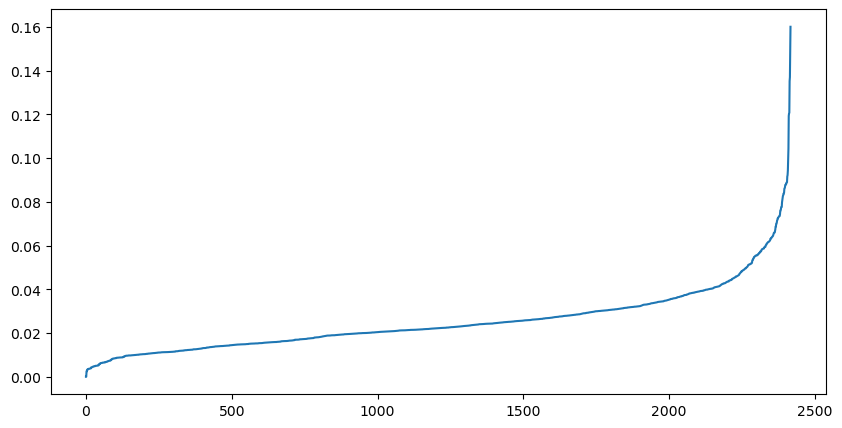

In [ ]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(train_data)
distances, idx = nn.kneighbors(train_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.04, min_samples=6)
dbscan.fit(train_data)

DBSCAN(eps=0.04, min_samples=6)

In [ ]:
labels = dbscan.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 18
Estimated number of noise points: 926
Silhouette Coefficient: -0.422


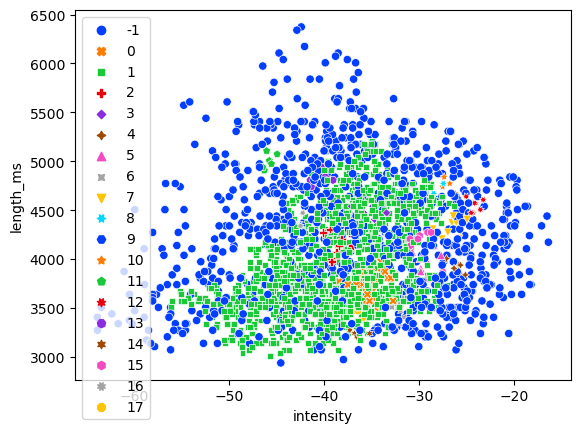

In [ ]:
sns.scatterplot(data=df_selected, x="intensity", y="length_ms", hue=dbscan.labels_,
                style=dbscan.labels_, palette="bright")
plt.show()

In [ ]:
pca_eps_values = np.arange(0.04,0.17,0.01)
pca_min_samples = np.arange(3,7)
pca_dbscan_params = list(itertools.product(pca_eps_values, pca_min_samples))
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(train_data)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    print(p[0])
    print([p[1]])
    pca_sil_score.append(silhouette_score(train_data, pca_dbscan_cluster.labels_))
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
pca_eps_min_df

0.04
[3]
0.04
[4]
0.04
[5]
0.04
[6]
0.05
[3]
0.05
[4]
0.05
[5]
0.05
[6]
0.060000000000000005
[3]
0.060000000000000005
[4]
0.060000000000000005
[5]
0.060000000000000005
[6]
0.07
[3]
0.07
[4]
0.07
[5]
0.07
[6]
0.08000000000000002
[3]
0.08000000000000002
[4]
0.08000000000000002
[5]
0.08000000000000002
[6]
0.09000000000000001
[3]
0.09000000000000001
[4]
0.09000000000000001
[5]
0.09000000000000001
[6]
0.1
[3]
0.1
[4]
0.1
[5]
0.1
[6]
0.11000000000000001
[3]
0.11000000000000001
[4]
0.11000000000000001
[5]
0.11000000000000001
[6]
0.12000000000000002
[3]
0.12000000000000002
[4]
0.12000000000000002
[5]
0.12000000000000002
[6]
0.13000000000000003
[3]
0.13000000000000003
[4]
0.13000000000000003
[5]
0.13000000000000003
[6]
0.14
[3]
0.14
[4]
0.14
[5]
0.14
[6]
0.15000000000000002
[3]
0.15000000000000002
[4]
0.15000000000000002
[5]
0.15000000000000002
[6]
0.16000000000000003
[3]
0.16000000000000003
[4]
0.16000000000000003
[5]
0.16000000000000003
[6]


,no_of_clusters,silhouette_score,epsilon_values,minimum_points
0,59,-0.436150,0.04,3
1,43,-0.447818,0.04,4
2,27,-0.460576,0.04,5
3,19,-0.421673,0.04,6
4,21,-0.332568,0.05,3
5,15,-0.293029,0.05,4
6,16,-0.342605,0.05,5
7,18,-0.345161,0.05,6
8,17,-0.212401,0.06,3
9,6,-0.167109,0.06,4


In [ ]:
dbscan = DBSCAN(eps=0.14, min_samples=3)
dbscan.fit(train_data)

DBSCAN(eps=0.14, min_samples=3)

In [ ]:
labels = dbscan.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 2
Silhouette Coefficient: 0.490


In [ ]:
train_df = df_selected
train_df["LABEL"]  =  labels

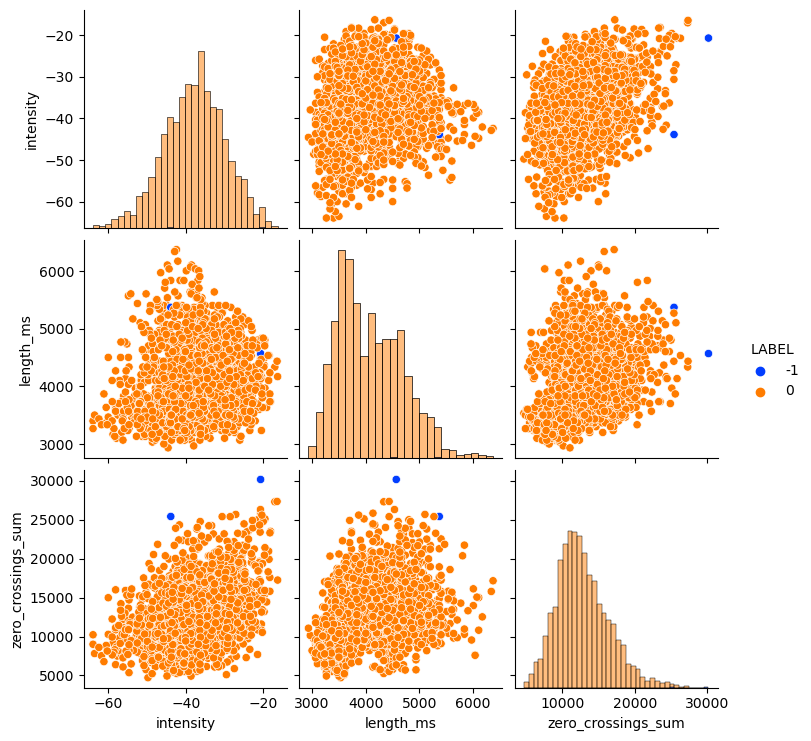

In [ ]:
sns.pairplot(data=train_df, hue="LABEL", diag_kind="hist", palette="bright")
plt.show()

## hierarchical clustering

In [ ]:
#Continuous features
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df)
train_data

array([[0.23305208, 0.56979173, 0.48262032, ..., 0.4357256 , 0.13341265,
        0.63271216],
       [0.28164097, 0.61717788, 0.36115917, ..., 0.43551534, 0.31060606,
        0.63728457],
       [0.5048007 , 0.66456403, 0.55056622, ..., 0.43667004, 0.05448389,
        0.63981134],
       ...,
       [0.6700611 , 0.40659359, 0.19833281, ..., 0.43175398, 0.05593306,
        0.56558978],
       [0.23305208, 0.38124809, 0.1964061 , ..., 0.4335173 , 0.21102804,
        0.54029148],
       [0.26214722, 0.5019204 , 0.18504247, ..., 0.435841  , 0.19563576,
        0.81531347]])

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete', compute_distances=True)
model = model.fit(train_data)

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward', compute_distances=True)
model = model.fit(train_data)

In [ ]:
labels = model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.209


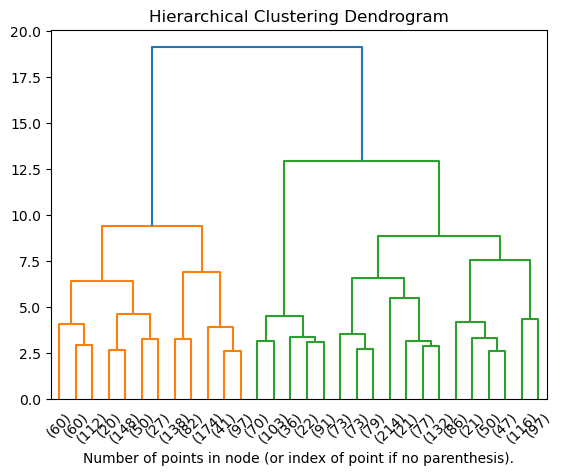

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
def sil_scores(X, Z, ts):
    '''
    Creates a list of silhouette scores for a predetermined range of clusters.
    '''
    scores = []

    for num_clust in ts:
        scores.append(silhouette_score(X, fcluster(Z, t=num_clust, criterion='maxclust')))

    return scores

scores = sil_scores(train_data, Z, range(2,50))

for t, s in zip(range(2,50), scores):
    print(f"With {t} clusters, the silhouette score is {s}")

With 2 clusters, the silhouette score is 0.1424461236874273
With 3 clusters, the silhouette score is 0.13664427278410307
With 4 clusters, the silhouette score is 0.1308290225117871
With 5 clusters, the silhouette score is 0.10349024366332069
With 6 clusters, the silhouette score is 0.12467080343974483
With 7 clusters, the silhouette score is 0.12031418570929847
With 8 clusters, the silhouette score is 0.12157449475874586
With 9 clusters, the silhouette score is 0.11399237476412152
With 10 clusters, the silhouette score is 0.11226987289973538
With 11 clusters, the silhouette score is 0.10433482008873518
With 12 clusters, the silhouette score is 0.10168546997439924
With 13 clusters, the silhouette score is 0.0908858639301424
With 14 clusters, the silhouette score is 0.0879275495898147
With 15 clusters, the silhouette score is 0.08783866483203676
With 16 clusters, the silhouette score is 0.0834424211715587
With 17 clusters, the silhouette score is 0.08787650692955586
With 18 clusters, the

In [ ]:
#Selected features
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_selected)
train_data

array([[0.56979173, 0.23305208, 0.48262032],
       [0.61717788, 0.28164097, 0.36115917],
       [0.66456403, 0.5048007 , 0.55056622],
       ...,
       [0.40659359, 0.6700611 , 0.19833281],
       [0.38124809, 0.23305208, 0.1964061 ],
       [0.5019204 , 0.26214722, 0.18504247]])

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete', compute_distances=True)
model = model.fit(train_data)

In [ ]:
labels = model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.310


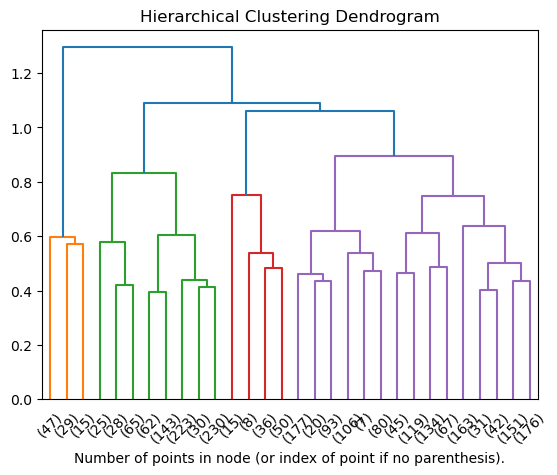

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
for t in range(2,50):
    model = AgglomerativeClustering(n_clusters=t, affinity='euclidean', linkage='complete', compute_distances=True)
    model = model.fit(train_data)
    labels = model.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
#     print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))
    print(f"With {t} clusters, the silhouette score is {silhouette_score(train_data, labels)}")

Estimated number of clusters: 2
Estimated number of noise points: 0
With 2 clusters, the silhouette score is 0.310377607958451
Estimated number of clusters: 3
Estimated number of noise points: 0
With 3 clusters, the silhouette score is 0.22372733503297043
Estimated number of clusters: 4
Estimated number of noise points: 0
With 4 clusters, the silhouette score is 0.20962683955030362
Estimated number of clusters: 5
Estimated number of noise points: 0
With 5 clusters, the silhouette score is 0.1957367633053749
Estimated number of clusters: 6
Estimated number of noise points: 0
With 6 clusters, the silhouette score is 0.16819448472639476
Estimated number of clusters: 7
Estimated number of noise points: 0
With 7 clusters, the silhouette score is 0.16047420631326964
Estimated number of clusters: 8
Estimated number of noise points: 0
With 8 clusters, the silhouette score is 0.1665616689312788
Estimated number of clusters: 9
Estimated number of noise points: 0
With 9 clusters, the silhouette s

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward', compute_distances=True)
model = model.fit(train_data)

In [ ]:
labels = model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(train_data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.272


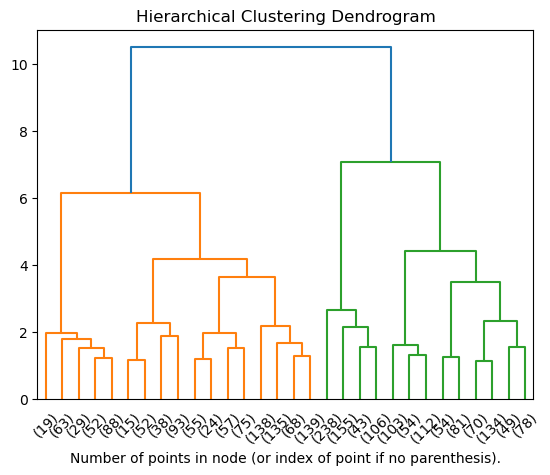

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()